In [2]:
from algorithm.louvain import louvain
from algorithm.spectral_clustering import spectral_clustering, normalized_spectral_clustering
from algorithm.hierarchical_clustering import mst_cut_clustering
from utils.analyze import get_rs_from_fixed_weighted_degree, compute_clustering, validation, metrics_to_df 
from utils.generation import multivariate_t_rvs, get_mean_cov

from scipy import stats
import pandas as pd
import numpy as np

In [4]:
m,s  = get_mean_cov(2,2,1,0)

In [30]:
size = 20000000
distr = multivariate_t_rvs(m,s,size,df=3)

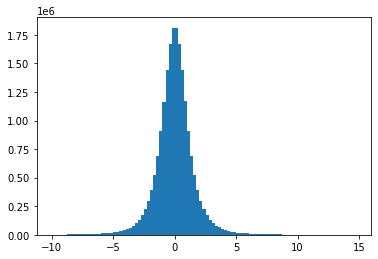

In [40]:
from matplotlib import pyplot as plt 
start = -10
bins = [start + x/4 for x in range(100)]
plt.hist(distr[:,0], bins = bins)
plt.show()

In [21]:
df40t2 = pd.read_csv('student2_graph_40_degree16_sample_40_repeates200',header=[0, 1], index_col=0 )
df80t2 = pd.read_csv('student2_graph_40_degree16_sample_80_repeates400',header=[0, 1], index_col=0 )
df400t2 = pd.read_csv('student2_graph_degree16_sample_400_repeates400',header=[0, 1], index_col=0 )


In [25]:
algos = list(set(x[0] for x in list(df40t2.columns)))
algos

['normalized_spectral_clustering',
 'louvain',
 'spectral_clustering',
 'mst_cut_clustering']

In [23]:
rs = get_rs_from_fixed_weighted_degree(degree=16, cluster_size= 20, num_clusters=2,r_out_bound = (0,1,100))

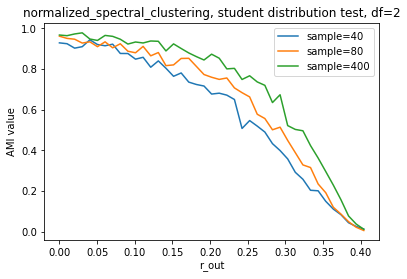

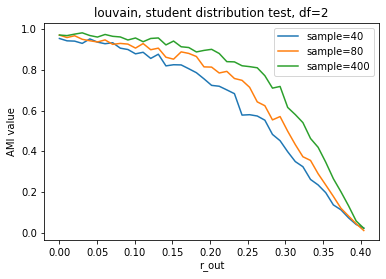

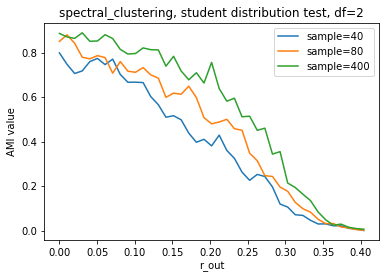

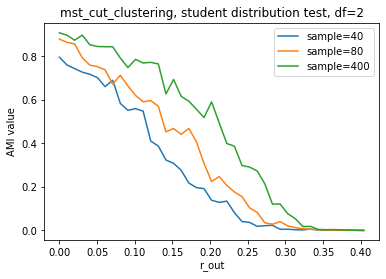

In [42]:
metric = 'AMI'
for algo in algos:
    df = pd.DataFrame(list(zip(rs[1], df40t2[algo][metric].values, df80t2[algo][metric].values, df400t2[algo][metric].values)), columns = ['r_out', 'sample=40', 'sample=80', 'sample=400']).set_index(['r_out'])
    df.plot(title=algo + ', student distribution test, df=2', ylabel = metric + ' value')

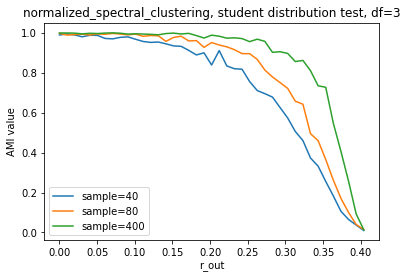

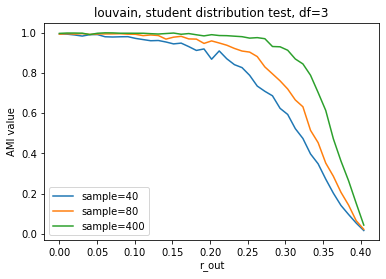

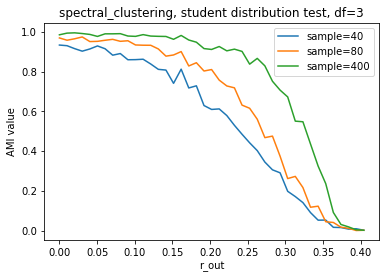

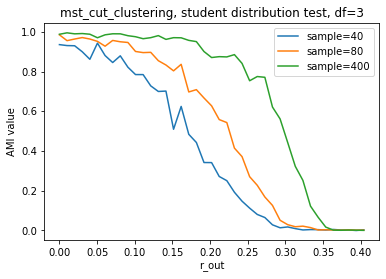

In [43]:
df40t3 = pd.read_csv('student3_graph_40_degree16_sample_40_repeates200',header=[0, 1], index_col=0 )
df80t3 = pd.read_csv('student3_graph_40_degree16_sample_80_repeates400',header=[0, 1], index_col=0 )
df400t3 = pd.read_csv('student3_graph_degree16_sample_400_repeates400',header=[0, 1], index_col=0 )
metric = 'AMI'
for algo in algos:
    df = pd.DataFrame(list(zip(rs[1], df40t3[algo][metric].values, df80t3[algo][metric].values, df400t3[algo][metric].values)), columns = ['r_out', 'sample=40', 'sample=80', 'sample=400']).set_index(['r_out'])
    df.plot(title=algo + ', student distribution test, df=3', ylabel = metric + ' value')
